<!-- dom:TITLE: Numerical solution of ordinary differential equations  -->
# Numerical solution of ordinary differential equations 
<!-- dom:AUTHOR: Anne Kværnø -->
<!-- Author: -->  
**Anne Kværnø**

Date: **Nov 2, 2018**

$\newcommand{mb}[1]{\mathbf{#1}}$



# Introduction
The topic of this note is the numerical solution of systems of ordinary differential
equations (ODEs). This has been discussed in previous courses, see for instance
the webpage 
[Differensialligninger](https://wiki.math.ntnu.no/tma4100/tema/differentialequations)
from Mathematics 1. 

### Scalar ODEs

A scalar ODE is an equation on the form

$$
y'(x) = f(x,y(x)), \qquad y(x_0)=y_0,
$$

where $y'(x)=\frac{dy}{dx}$. The *inital condition* $y(x_0)=y_0$ is required for a unique
solution. 

**NB!** It is common to use the term *initial value problem (IVP)* for an ODE for which the inital value $y(x_0)=y_0$ is given, and we only are interested in the solution for $x>x_0$. In this note, only initial value problems are considered.  

**Example 1:** 
Given the ODE

$$
y'(x) = -2xy(x).
$$

The solution of this equation is

$$
y(x) = C e^{-x^2},
$$

where $C$ is a constant. To get a unique solution, we need to decide on one point of the
solution, for instance $y(0)=1$, which then allows to fix $C$ and yields the
solution

$$
y(x) = e^{-x^2},
$$

### Systems of ODEs

A system of $m$ ODEs are given by

$$
\begin{align*}
y_1' &= f_1(x,y_1,y_2,\dotsc,y_m), & y_1(x_0) &= y_{1,0} \\ 
y_2' &= f_2(x,y_1,y_2,\dotsc,y_m), & y_2(x_0) &= y_{2,0} \\ 
     & \vdots                      &          &\vdots    \\ 
y_m' &= f_m(x,y_1,y_2,\dotsc,y_m), & y_m(x_0) &= y_{m,0} \\ 
\end{align*}
$$

or more compactly by

$$
\mb{y}'(x) = \mb{f}(x, \mb{y}(x)),  \qquad \mb{y}(x_0) = \mb{y}_0
$$

where we use boldface to denote vectors in $\\{R}^m$.

$$
\mb{y}(x) = \left( \begin{array}{c} y_1(x) \\ y_2(x) \\ \vdots \\ y_m(x) \end{array} \right), \qquad
\mb{f}(x,\mb{y}) = \left( \begin{array}{c} f_1(x,y_1,y_2,\dotsc,y_m), \\ f_2(x,y_1,y_2,\dotsc,y_m), \\ \vdots \\ f_m(x,y_1,y_2,\dotsc,y_m), \end{array} \right), \qquad
\mb{y}_0 = \left( \begin{array}{c} y_{1,0} \\ y_{2,0} \\ \vdots \\ y_{m,0} \end{array} \right),
$$

**Example 2:**
[The Lotka-Volterra equation](https://en.wikipedia.org/wiki/Lotka–Volterra_equations) is a system of two ODEs describing the interaction between preys and predators over time. The system is given by

$$
\begin{align*}
y'(x) &= \alpha y(x) - \beta y(x) z(x) \\ 
z'(x) &= \delta y(x)z(x) - \gamma z(x)
\end{align*}
$$

where $x$ denotes time, $y(x)$ describes the population of preys and $z(x)$ the population of predators. 
The parameters $\alpha, \beta, \delta$ and $\gamma$ depends on the populations to be modelled.  

### Higher order ODEs

An initial value  ODE of order $m$ is given by

$$
u^{(m)} = f(x,u,u',\dotsc,u^{(m-1)}), \qquad u(x_0)=u_0, \quad
u'(x_0)=u'_0,\quad  \dotsc, \quad u^{(m-1)}(x_0) = u^{(m-1)}_0.
$$

Here $u^{(1)} =u'$ and $u^{(m+1)}=\frac{du^{(m)}}{dx}$, for $m>0$.

**Example 3:**

[Van der Pol's equation](https://en.wikipedia.org/wiki/Van_der_Pol_oscillator)
is a second order differential equation, given by:

$$
u^{(2)} = \mu (1-u^2)u' - u, \qquad u(0)=u_0, \quad u'(0)=u'_0.
$$

where $\mu>0$ is some constant.  As initial values $u_0=2$ and $u'_0=0$ are common choices. 

Later in the note we will see how such equations can be rewritten as a system of first order ODEs. 
Systems of higher order ODEs can be treated similarly.  


# Numerical methods for solving ODEs
In this note some techniques for solving ordinary differential equations will be discussed. For simplicity,  the methods will be developed based on scalar ODEs, but the results are equally valid for systems of equations. All the methods are onestep methods. Given the ODE and the intial values $(x_0,y_0)$. Choose some step size $h$, and let $x_1=x_0+h$. Based on this information, a onestep method is used to calculate an approximation $y_1$ to $y(x_1)$. And then the process can be repeated from $(x_1,y_1)$ to $(x_2,y_2)$, where $x_2=x_1+h$ and $y_2$ is the calculated approximation to $y(x_2)$. This process is repeated until some final point, here called $x_{end}$ is reached. 

It should be emphasized that this strategy only will find approximations to the exact solution in some discrete points $x_n$, $n=0,1,\dots,$. 


# Euler's method
Let us start with the simplest example, [Euler's method](https://wiki.math.ntnu.no/tma4100/tema/differentialequations?&#numeriske_losninger), known from Mathematics 1. 

Given an IVP:

$$
y'(x) = f(x,y(x)), \qquad y(x_0)=y_0.
$$

Choose some step size $h$. The trick is as follows: 

Do a Taylor expansion (*Preliminaries*, section 4) of the exact (but unknown) solution $y(x_0+h)$ around $x_0$:

$$
y(x_0+h) = y(x_0) + h y'(x_0) + \frac{1}{2}h^2 y''(x_0) + \dotsm.
$$

Assume the step size $h$ to be small, such that the solution is dominated by the first two terms.  In that case, these can be used as the numerical approximation in the next step:

$$
y(x_0+h) \approx  y(x_0) + h y'(x_0) = y_0 + hf(x_0, y_0)
$$

giving

$$
y_1 = y_0 + hf(x_0,y_0).
$$

Repeating this results in 
**Euler's method.**

* Given a function $f(x,y)$ and an initial value $(x_0,y_0)$.

* Choose a step size $h$. 

* For $i=0,1,2,\dotsc$ 

  * $\displaystyle y_{n+1}  = y_{n} + h f(x_n, y_n)$ 

  * $x_{n+1}=x_n+h$.



# Implementation
We would like to make this implementation more like a test platform. It should
be simple to implement and test methods other than Euler's. That is why the
implementaion here is divided in two parts:

* `ode_solver`: This is a generic solver, and can be used by other methods than Euler's. 

* `euler`:      This function does one step of Euler's method. 

Start by calling the necessary modules:

In [3]:
%matplotlib inline

from numpy import *
from numpy.linalg import norm
from matplotlib.pyplot import *
newparams = {'figure.figsize': (8.0, 4.0), 'axes.grid': True,
             'lines.markersize': 8, 'lines.linewidth': 2,
             'font.size': 14}
rcParams.update(newparams)

In [4]:
def euler(f, x, y, h):
    # One step of the Euler method
    y_next = y + h*f(x, y)
    x_next = x + h
    return x_next, y_next

In [5]:
def ode_solver(f, x0, xend, y0, h, method=euler):
    # Generic solver for ODEs
    #    y' = f(x,y), y(a)=y0
    # Input: f, the integration interval x0 and xend, 
    #        the stepsize h and the method of choice.  
    #   
    # Output: Arrays with the x- and the corresponding y-values. 
    
    # Initializing:
    y_num = array([y0])    # Array for the solution y 
    x_num = array([x0])    # Array for the x-values

    xn = x0                # Running values for x and y
    yn = y0 

    # Main loop
    while xn < xend - 1.e-10:            # Buffer for truncation errors        
        xn, yn = method(f, xn, yn, h)    # Do one step by the method of choice
        
        # Extend the arrays for x and y
        y_num = concatenate((y_num, array([yn])))
        x_num = append(x_num,xn)
        
    return x_num, y_num

The function `method`, doing one step with a given method can be changed, but the call of the function has to be of the form:

`x_next, y_next = method(f, x, y, h)`. 


**Numerical example 1:**
Test the implementation of Euler's method on the problem

$$
y'(x) = -2xy(x), \qquad y(0)=1, \qquad 0 \leq x \leq 1,
$$

for which the exact solution

$$
y(x) = e^{-x^2}.
$$

Try with different step sizes, for instance $h=0.1$, $h=0.05$ and $h=0.01$. In
each case, compare the numerical solution with the exact one. 

The following script solves the equation numerically.

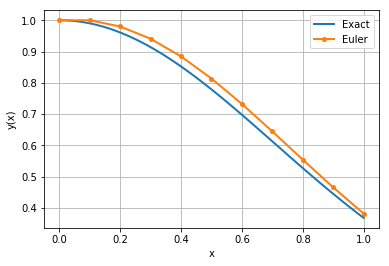

In [6]:
# Numerical experiment 1

# The right hand side of the ODE
def f(x, y):
    return -2*x*y

# The exact solution, for verification
def y_exact(x):
    return exp(-x**2)

x0, xend = 0, 1               # Integration interval
y0 = 1                        # Initial value for y
h = 0.1                       # Stepsize

# Solve the equation
x_num, y_num = ode_solver(f, x0, xend, y0, h)

# Plot of the exact solution
x = linspace(x0, xend, 101)
plot(x, y_exact(x))

# Plot of the numerical solution
plot(x_num, y_num, '.-')

xlabel('x')
ylabel('y(x)')
grid(True)
legend(['Exact', 'Euler']);

We can also make a plot of the error in each step:

Max error =  0.03480305692859509


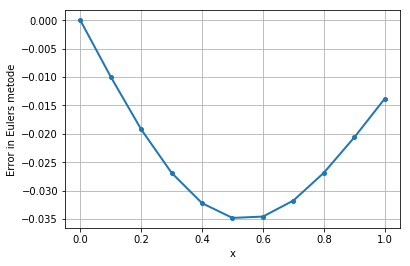

In [7]:
# Calculate and plot the error in the x-values
error = y_exact(x_num)-y_num
plot(x_num, error, '.-')
xlabel('x')
ylabel('Error in Eulers metode')
grid(True)
print('Max error = ', max(abs(error)))  # Print the maximum error

**Numerical exercise 1:**
Repeat the example on a [logistic
equation](https://en.wikipedia.org/wiki/Logistic_function#Applications), given
by

$$
y' = y(1-y), \qquad y(0) = y_0,
$$

on the interval $[0,10]$. Use $y_0=0.1$ as initial value.  For comparision, the exact solution is

$$
y(x) = \frac{1}{1-(1-\frac{1}{y_0})e^{-x}}.
$$

Solve the equation numerically by using different step sizes $h$, and try
different initial values. 


## Systems of ODEs
Euler's method works equally well for systems of $m$ ODEs

$$
\mb{y}'(x) = \mb{f}(x, \mb{y}(x)),  \qquad \mb{y}(x_0) = \mb{y}_0
$$

Euler's method is now defined to be

$$
\mb{y}_{n+1} = \mb{y}_n + h \mb{f}(x_n, \mb{y}_n), \qquad n=0,\dotsc,N-1.
$$

The implementation above can be used without any changes.  
The only difference from the scalar ODE case is that $y_{n}\in \mathbb{R}^m$ and
$\mb{f}:\mathbb{R} \times \mathbb{R}^m \rightarrow \mathbb{R}^m$. Meaning that
the function in which the right hand side of the ODE is defined takes a scalar
$x$ and an array of length $m$, $\mb{y}_n$ as inputs, and returns an array of
length $m$.

**Numerical example 2:**
Solve the Lotka-Volterra equation

$$
\begin{align*}
y_1'(x) &= \alpha y_1(x) - \beta y_1(x) y_2(x), & y_1(0) &=  y_{1,0}, \\ 
y_2'(x) &= \delta y_1(x)y_2(x) - \gamma y_2(x), & y_2(0) &= y_{2,0}.
\end{align*}
$$

In this example, use the parameters and initial values

$$
\alpha=2,\quad \beta=1, \quad \delta=0.5,\quad \gamma=1, \qquad y_{1,0}=2,
\quad y_{2,0} = 0.5.
$$

Solve the equation over the interval $[0,20]$, and use $h=0.02$. Try also other
step sizes, e.g. $h=0.1$ and $h=0.002$. 

**NB!** In this case, the exact solution is not known. What is known is that the
solutions are periodic and positive. Is this the case here? Check for different values of $h$.

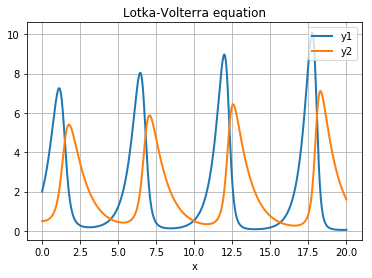

In [8]:
# Numerical example 2, system of equations.

# The right hand side of the ODE
# NB! y is an array of dimension 2, and so is dy. 
def lotka_volterra(x, y):
    alpha, beta, delta, gamma = 2, 1, 0.5, 1     # Set the parameters
    dy = array([alpha*y[0]-beta*y[0]*y[1],       # 
                delta*y[0]*y[1]-gamma*y[1]])
    return dy

x0, xend = 0, 20            # Integration interval
y0 = array([2, 0.5])        # Initital values

# Solve the equation
x_lv, y_lv = ode_solver(lotka_volterra, x0, xend, y0, h=0.02) 

# Plot the solution
plot(x_lv,y_lv);
xlabel('x')
title('Lotka-Volterra equation')
grid(True)
legend(['y1','y2'],loc=1);

## Higher order ODEs

What about higher order ODEs? Can they be solved by Euler's method as well?

Given the $m$-th order ODE

$$
u^{(m)}(x) = f\big(x, u(x), u'(x), \dotsc, u^{(m-1)}\big).
$$

For a unique solution, we assume that the initial values

$$
u(x_0), u'(x_0), u''(x_0), \dotsc, u^{(m-1)}(x_0)
$$

are known. Such equations can be written as a system of first order ODEs by the
following trick:

Let

$$
y_1(x) = u(x), \quad y_2(x) = u'(x), \quad
y_3(x) = u^{(2)}(x), \quad \dotsc \quad, y_{m}(x) = u^{(m-1)}(x)
$$

such that

$$
\begin{align*}
  y_1' &= y_2, & y_1(a) &= u(a) \\ 
  y_2' &= y_3, & y_2(a) &= u'(a) \\ 
       & \vdots  && \vdots\\ 
  y_{m-1}' &= y_m, & y_{m-1}(a) &= u^{(m-2)}(a) \\ 
  y_m' &= f(x, y_1, y_2, \cdots, y_{m-1},y_m), & y_m(a) &= u^{(m-1)}(a)
\end{align*}
$$

which is nothing but a system of first order ODEs, and can be solved by Euler's
method exactly as before. 

**Numerical example 3:**

The Van der Pol oscillator is described by the second order differential
equation

$$
u'' = \mu (1-u^2)u' - u, \qquad u(0)=u_0, \quad u'(0)=u_0'.
$$

It can be rewritten as a system of first order ODEs:

$$
\begin{align*}
y_1' &= y_2, & y_1(0) &= u_0,  \\ 
y_2' &= \mu(1-y_1^2)y_2 - y_1, & y_2(0) &= u_0'.
\end{align*}
$$

Let  $\mu=2$, $u(0)=2$ and $u'(0)=0$ and solve the equation over the interval
$[0,20]$, using  $h=0.1$. Play with different step sizes, and maybe also with
different values of $\mu$.

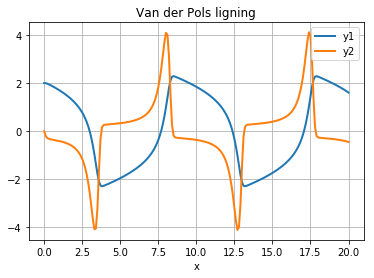

In [9]:
# Numerical example 3

# Define the ODE
def van_der_pol(x, y):
    mu = 2
    dy = array([y[1],
                mu*(1-y[0]**2)*y[1]-y[0] ])
    return dy

# Solve the equation
x_vdp, y_vdp = ode_solver(van_der_pol, x0=0, xend=20, y0=array([2,0]), h=0.1)

# Plot the solution
plot(x_vdp,y_vdp);
xlabel('x')
title('Van der Pols ligning')
legend(['y1','y2'],loc=1);

# Error analysis

When an ODE is solved by Euler's method over some interval $[x_0,x_{end}]$, how
will the error at $x_{end}$ (or some arbitrary point) depend on the number of
steps. Or more spesific, choose the number of steps $N$, let the step size be
$h=(x_{end}-x_0)/N$, what can we say about the error $e_N = y(x_{end})-y_N$? 

**Numerical example 4:**
Solve the equation of Example 1,

$$
y'(x) = -2xy(x), \qquad y(0)=1,
$$

with exact solution $y(x) =  e^{-x^2}$, 
over the interval $[0,1]$.  Use different
step sizes $h$, and for each $h$, measure the error at $x=1$.

In [10]:
# Numerical example 4
def f(x, y):                # The right hand side of the ODE
    return -2*x*y

def y_exact(x):            # The exact solution
    return exp(-x**2)

h = 0.1                     # The stepsize
x0, xend = 0, 1             # Integration interval
y0 = 1                      # Initial value

print('h           error\n---------------------')

# Main loop
for n in range(10):
    x_num, y_num = ode_solver(f, x0, xend, y0, h)   # Solve the equation 
    error = abs(y_exact(xend)-y_num[-1])            # Error at the end point
    print(format('{:.3e}   {:.3e}'.format( h, error)))   
    h = 0.5*h                                       # Reduce the stepsize

h           error
---------------------
1.000e-01   1.383e-02
5.000e-02   6.505e-03
2.500e-02   3.157e-03
1.250e-02   1.555e-03
6.250e-03   7.720e-04
3.125e-03   3.846e-04
1.563e-03   1.920e-04
7.813e-04   9.589e-05
3.906e-04   4.792e-05
1.953e-04   2.396e-05


The table generated from this code shows that whenever the step size is reduced
with a factor of 0.5, so is the error. Therefore, we expect

$$
|y(x_{end}) - y_N| \approx C h, \qquad h=\frac{x_{end}-x_0}{N}.
$$

The method seems to be of order 1, see *Preliminaries*, section 3.1.

In the following we will prove that this is in fact the case. The
error analysis will be done on a scalar equation, but it can as well be extended
to systems of equations. 

## Local and global errors
In this discussion we have to consider two kinds of errors: 

* *Local truncation error* $d_{n+1}$: This is the error done on one step, starting from $(x_n,y(x_n))$. 

* *Global error* $e_{n}$: This is the difference between the exact and the numerical solution after $n$ steps, that is $e_{n} = y(x_n)-y_n$. 

In the following, we will see how to express the local truncation error, and we will see how the global and the local errors are related. We will use all this to find an upper bound for the global error at the end point $x_N=x_{end}$. The technique described here is quite standard for these kinds of error analysis.

Let us start with the local truncation error. Euler's method is nothing but the first two terms of the Taylor expansion of the exact solution. As a consequence, the local truncation error is the remainder term $R_{2}(x)$ (see *Preliminaries*, section 4).

$$
d_{n+1} = y(x_n+h) - \big( y(x_n) + h y'(x_n) \big) = \frac{1}{2}h^2 y''(\xi), \qquad \xi \in (x_n, x_n+h).
$$

Next, use the fact that  $y'(x_n) = f(x_n, y(x_n))$ we have the following two expressions:

$$
\begin{align*}
 y(x_n+h) &= y(x_n) + h f(x_n,y(x_n)) + d_{n+1},  & \text{the equation above} \\ 
 y_{n+1} &= y_n + h f(x_n, y_n), & \text{Euler's method}
\end{align*}
$$

Subtract the second from the first, and use that $e_{n} = y(x_n)-y_n$, and use Result 3 in *Preliminaries*, section 5:

$$
e_{n+1} = e_n + h \big( f(x_n, y(x_n)) - f(x_n, y_n) \big) + d_{n+1}
          = e_n + h f_y(x_n, \eta) e_n + d_{n+1},
$$

where  $f_y = \frac{\partial f}{\partial y}$, and $\eta$ is some value between $y_n$ and $y(x_n)$. 
Take the absolute value on each side, and apply the triangle inequality:

$$
|e_{n+1}| = |e_n + h f_y(x_n, \eta) e_n + d_{n+1}| <  |e_n| + h |f_y(x_n, \eta)|| e_n| + |d_{n+1}|.
$$

Assume now that there exist positive constants $D$ and $L$ satisfying

$$
|f_y(x,y)| \leq L \qquad \text{and} \qquad |y''(x)| \leq 2D,
$$

for all values of $x,y$. From the inequality above we get

$$
|e_{n+1}| < (1+hL)|e_n| + Dh^2.
$$

Since $y_0=y(x_0)$ we get $e_0=0$. The inequality above results in

$$
\begin{align*}
|e_1| &\leq Dh^2 \\ 
|e_2| & \leq (1+hL)|e_1| + Dh^2 \leq \big((1+hL)+1\big) Dh^2 \\ 
|e_3| &\leq (1+hL)|e_2|+ Dh^2 \leq \big((1+hL)^2 + (1+hL) + 1\big) Dh^2 \\ 
& \vdots \\ 
|e_N| & \leq (1+hL)|e_2|+ Dh^2 \leq \sum_{n=0}^{N-1} (1+hL)^n Dh^2
\end{align*}
$$

We will now apply two well known results: 
* The sum of a truncated geometric series: 

  * $\displaystyle \sum_{n=0}^{N-1}r^n = \frac{r^N-1}{r-1}$ for $r\in \mathbb{R}$. 


* The series of the exponential: 

  * $\displaystyle e^x = 1+x+ \frac{1}{2}x^2 + \dotsm = 1+x+ \sum_{n=2}^{\infty}\frac{x^n}{n!}$ 

  which proves that $1+x < e^x$ whenever $x>0$. 

Using these results, we can show the following:

$$
\sum_{n=0}^{N-1} (1+hL)^n = \frac{(1+hL)^N-1}{(1+hL)-1}
\leq \frac{(e^{hL})^N-1}{hL} = \frac{e^{hLN}-1}{hL}
= \frac{e^{L(x_{end}-x_0)}-1}{hL},
$$

where the last equality is because $(x_{end}-x_0)=hN$. 
Plug this into the inequality for $|e_{N}|$ above, and the following upper bound for the global error has been proved:

$$
|y(x_end) - y_N| = |e_N| \leq \frac{e^{L(x_{end}-x_0)}-1}{L} D h =  C h,
$$

where the constant $C=\frac{e^{L(x_{end}-x_0)}-1}{L} D$ depends on the length of the integration interval $x_{end}-x_0$, of certain properties of the equation ($L$ and $D$), but *not* on the step size $h$.

The numerical solution converges to the exact solution since

$$
\lim_{N\rightarrow \infty} |e_N| = 0.
$$

If the step size is reduced by a factor of 0.5, so will the error. Therefore our theory is in coincidence with the previous numerical result. 


## A general convergence result

A one-step method applied to a system of ODEs $\mb{y}'(x)=\mb{f}(x,\mb{y}(x))$ can be written in the following generic form

$$
\mb{y}_{n+1} = \mb{y}_n + h \mb{\Phi}(x_n, \mb{y}_n; h).
$$

where the increment function $\mb{\Phi}$ typically depend on the function $\mb{f}$ and some parameters defining the method.

**Definition: Order of a method.**

A method is of order $p$ if there is a constant $C$ such that

$$
\|\mb{e}_N\| = \|\mb{y}(x_{end})-\mb{y}_N\| \leq C h^p,
$$

where $N$ is the number of steps taken to reach $x_{end}$, using step size $h=(x_{end}-x_0)/N$.



The local truncaton error $\mb{d}_{n+1}$ of this method is

$$
\mb{d}_{n+1} = \mb{y}(x_{n+1}) - \left (\mb{y}(x_n) + h \mb{\Phi}(x_n, \mb{y}(x_n); h)\right)
$$

Replace the absolute values in the above proof with norms (*Preliminaries*, section 1), and the above argument can be used to prove the following: 

**Theorem: Convergence of one-step methods.**

Assume that there exist  positive constants $M$ and $D$ such that the increment function satisfies

$$
\| \mb{\Phi}(x,\mb{y};h) - \mb{\Phi}(x,\mb{z};h) \| \leq M \| \mb{y}-\mb{z} \|
$$

and the local trunctation error satisfies

$$
\| \mb{y}(x+h) - \left (\mb{y}(x) + h \mb{\Phi}(x, \mb{y}(x), h)\right) \| \leq Dh^{p+1}
$$

for all $x$, $\mb{y}$ and $\mb{z}$ in the neighbourhood of the solution. In that case, the global error satisfies

$$
\|\mb{e}_N\| = \|\mb{y}(x_{end})-\mb{y}_N\| \leq C h^p, \qquad C = \frac{e^{M(x_{end}-x_0)}-1}{M}.
$$

It can be proved that the first of these conditions are satisfied for all the methods that will be considered here. 



### Heun's method

There are better methods than Euler's, and here we will discuss one.
Given an ODE

$$
\mb{y}'(x) = \mb{f}(x,\mb{y}(x)).
$$

The exact solution $\mb{y}(x)$ of the ODE can be written in integral form as:

$$
\mb{y}(x_n + h) = \mb{y}(x_n) + \int_{x_n}^{x_{n}+h} \mb{f}(x,\mb{y}(x)) dx.
$$

Solve the integral by the trapezoidal rule for integrals:

$$
\mb{y}(x_n+h) \approx \mb{y}(x_n) + \frac{h}{2}
\big(\mb{f}(x_n, \mb{y}(x_n)) + \mb{f}(x_{n+1},\mb{y}(x_{n+1})\big).
$$

Replace $\mb{y}(x_n)$ and $\mb{y}(x_{n+1})$ by the approximations $\mb{y}_n$ and $\mb{y}_{n+1}$. The resulting method is the trapezoidal rule for ODEs, given by

$$
\mb{y}_{n+1} = \mb{y}_{n} + \frac{h}{2} \big( \mb{f}(x_n,\mb{y}_n) + \mb{f}(x_{n+1},\mb{y}_{n+1})\big).
$$

This is an example of an *implicit* method: If $x_n,\mb{y}_n$ is known, a nonlinear equation has to be solved to find $\mb{y}_{n+1}$, and this has to be done for each step. To avoid this, we can approximate $\mb{y}_{n+1}$ in the right hand side of the solution by one step of Euler's method, resulting in [Heun's method](https://wiki.math.ntnu.no/tma4100/tema/differentialequations?&#numeriske_losninger):

$$
\begin{align*}
   \mb{u}_{n+1} &= \mb{y}_n + h \mb{f}(x_n, \mb{y}_n), \\ 
   \mb{y}_{n+1} &= \mb{y}_n + \frac{h}{2} \big(\mb{f}(x_n,\mb{y}_n) + \mb{f}(x_{n+1},\mb{u}_{n+1}) \big).
\end{align*}
$$

The method is commonly written in the form

$$
\begin{align*}
  \mb{k}_1 &= \mb{f}(x_n, \mb{y}_n), \\ 
  \mb{k}_2 &= \mb{f}(x_n+h, \mb{y}_n+h \mb{k}_1), \\ 
  \mb{y}_{n+1} &= \mb{y}_n + \frac{h}{2}(\mb{k}_1 + \mb{k}_2).
\end{align*}
$$

The increment function for this method is

$$
\mb{\Phi}(x,\mb{y};h) = \frac{1}{2}\big(\mb{f}(x,\mb{y})+\mb{f}(x+h,\mb{y}+\mb{f}(x,\mb{y}))\big).
$$

### Implementation

One step of Heuns's method is implemented as follows:

In [11]:
def heun(f, x, y, h):
    # One step of Heun's method
    k1 = f(x, y)
    k2 = f(x+h, y+h*k1)
    y_next = y + 0.5*h*(k1+k2)
    x_next = x + h
    return x_next, y_next

**Numerical example 5:**
Let us compare the numerical solution from Euler's and Heun's methods on the scalar test 
problem

$$
y' = -2xy, \qquad y(0)=1
$$

with the exact solution
$y(x) = e^{-x^2}$ on the interval $[0,1]$.
Use  $h=0.1$ for Euler's method and $h=0.2$ for Heun's metode. Thus both require a total of 10
function evaluations, and the total amount of computational work is comparable.

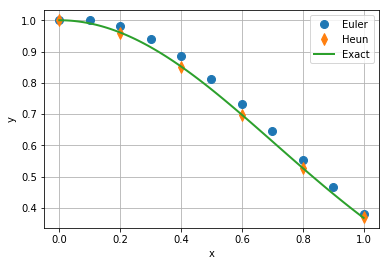

In [12]:
# Numerical experiment 5

def f(x, y):            # The right hand side of the ODE
    return -2*x*y

def y_exact(x):         # The exact solution
    return exp(-x**2)

h = 0.1                 # The stepsize
x0, xend = 0, 1         # Integration interval             
y0 = 1                  # Initial value

# Solve the equations
xn_euler, yn_euler = ode_solver(f, x0, xend, y0, h, method=euler)
xn_heun, yn_heun = ode_solver(f, x0, xend, y0, 2*h, method=heun)     

# Plot the solution
x = linspace(x0, xend, 101)
plot(xn_euler, yn_euler, 'o') 
plot(xn_heun, yn_heun, 'd')
plot(x, y_exact(x))
legend(['Euler','Heun','Exact']);
xlabel('x')
ylabel('y');

The errors of the two approximations are:

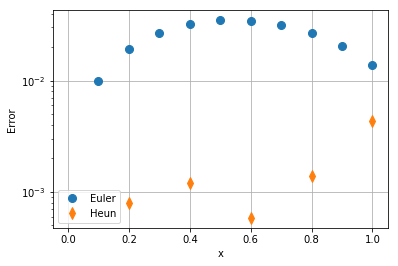

In [13]:
# Plot the error of the two methods
semilogy(xn_euler, abs(y_exact(xn_euler)- yn_euler), 'o');
semilogy(xn_heun, abs(y_exact(xn_heun)- yn_heun), 'd');
xlabel('x')
ylabel('Error')
legend(['Euler', 'Heun'],loc=3)
grid(True);

Let us finally compare the error  at $x_{end}$ when the two methods are applied to our test problem,
 for different values of $h$:

In [14]:
# Print the error as a function of h. 
print('Error in Euler and Heun\n')
print('h           Euler       Heun')
print('---------------------------------')
for n in range(10):
    x_euler, y_euler = ode_solver(f, x0, xend, y0, h, method=euler)
    x_heun, y_heun = ode_solver(f, x0, xend, y0, 2*h, method=heun)
    error_euler = abs(y_exact(xend)-y_euler[-1])
    error_heun = abs(y_exact(xend)-y_heun[-1])
    print(format('{:.3e}   {:.3e}   {:.3e}'.format( h, error_euler, error_heun)))
    h = 0.5*h

Error in Euler and Heun

h           Euler       Heun
---------------------------------
1.000e-01   1.383e-02   4.308e-03
5.000e-02   6.505e-03   1.174e-03
2.500e-02   3.157e-03   3.011e-04
1.250e-02   1.555e-03   7.601e-05
6.250e-03   7.720e-04   1.909e-05
3.125e-03   3.846e-04   4.781e-06
1.563e-03   1.920e-04   1.196e-06
7.813e-04   9.589e-05   2.992e-07
3.906e-04   4.792e-05   7.483e-08
1.953e-04   2.396e-05   1.871e-08


First of all, Heun's method is significantly more accurate than Euler's method, even when the 
number of function evaluations are the same. Further, we notice that the error from Heun's method is reduced by a factor of approximately 1/4 whenever the step size is reduced by a factor 1/2, indicating that the error $|y(x_{end}-y_N| \approx Ch^2$, and the method is of order 2.  

**Numerical example 6:**
Solve the Lotka-Volterra equation from Numerical example 2 by Euler's and Heun's methods, again using twice as many steps for Euler's method than for Heun's method. 
* Use $h=0.01$ for Euler's method and $h=0.02$ for Heun's method. 

* Use $h=0.1$ for Euler's method and $h=0.2$ for Heun's method.

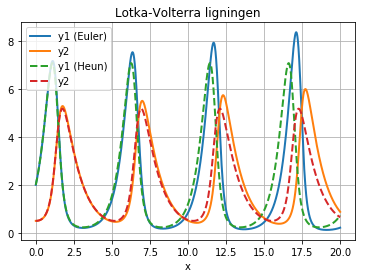

In [15]:
# Numerical example 6

def lotka_volterra(x, y):       # The Lotka-Volterra equation
    alpha, beta, delta, gamma = 2, 1, 0.5, 1        # Parameters
    dy = array([alpha*y[0]-beta*y[0]*y[1],  
                delta*y[0]*y[1]-gamma*y[1]])
    return dy

x0, xend = 0, 20
y0 = array([2, 0.5])
h = 0.01

x_euler, y_euler = ode_solver(lotka_volterra, x0, xend, y0, h, method=euler)
x_heun, y_heun = ode_solver(lotka_volterra, x0, xend, y0, 2*h, method=heun)

plot(x_euler,y_euler)
plot(x_heun, y_heun, '--')
xlabel('x')
title('Lotka-Volterra ligningen')
legend(['y1 (Euler)','y2', 'y1 (Heun)', 'y2'],loc=2)
grid(True);

**Numerical exercises:**
1. Solve Van der Pol's equation by use of Heun's method. Experiment with different choices of the step size $h$ and compare with the results from Numerical experiment 3. 

2. Implement the [classical Runge - Kutta method](https://en.wikipedia.org/wiki/Runge–Kutta_methods#The_Runge–Kutta_method) and verify numerically that the order of the method is 4. The method is given by

$$
\begin{align*}
   \mb{k}_1 &= \mb{f}(x_n, \mb{y}_n)\\ 
   \mb{k}_2 &= \mb{f}\left(x_n+\frac{h}{2}, \mb{y}_n + \frac{h}{2}\mb{k}_1\right) \\ 
   \mb{k}_3 &= \mb{f}\left(x_n+\frac{h}{2}, \mb{y}_n + \frac{h}{2}\mb{k}_2\right) \\ 
   \mb{k}_4 &= \mb{f}(x_n+h, \mb{y}_n + h\mb{k}_3)\\ 
   \mb{y}_{n+1} &= \mb{y}_n + \frac{h}{6}(\mb{k}_1 + 2\mb{k}_2 + 2\mb{k}_3 + \mb{k}_4).
   \end{align*}
$$

### Convergence properties of Heun's method

To prove convergence and to find the order of a method two things are needed: 
* the local truncation error, expressed as a power series in the step size $h$

* the condition  $\| \mb{\Phi}(x,\mb{y};h) - \mb{\Phi}(x,\mb{z};h) \| \leq M \| \mb{y}-\mb{z} \|$

The local truncation error is found by making Taylor expansions of the exact and the numerical solutions starting from the same point, and compare. In practice, this is not trivial. For simplicity, we will here do this for a scalar equation $y'(x)=f(x,y(x))$. The result is valid for systems as well 

In the following, we will use the notation

$$
f_x = \frac{\partial f}{\partial x}, \qquad f_y = \frac{\partial f}{\partial y}, 
\qquad f_{xx} = \frac{\partial^2 f}{\partial x^2} \qquad  f_{xy} 
= \frac{\partial^2f}{\partial x\partial y} \qquad\text{etc.}
$$

Further, we will surpress the arguments of the function $f$ and its deriviatives. So $f$ is to be understood as $f(x,y(x))$ although it is not explicitely written. 


The Taylor expansion of the exact solution $y(x+h)$ is given by

$$
y(x+h)=y(x)+hy'(x) + \frac{h^2}{2}y''(x) + \frac{h^3}{6}y'''(x) + \dotsm.
$$

Higher derivatives of $y(x)$ can be expressed in terms of the function $f$ by using the chain rule and the product rule for differentiation.

$$
\begin{align*}
    y'(x) &= f, \\ 
    y''(x) &= f_x  + f_y y' = f_x + f_y f,\\ 
    y'''(x) &= f_{xx} + f_{xy} y' + f_{yx}f + f_{yy}y'f + f_y f_y y' 
             = f_{xx}+2f_{xy}f+f_{yy}f^2 + (f_y)^2f.
\end{align*}
$$

Find the series of the exact and the numerical solution around $x_0,y_0$ (any other point will do equally well). From the discussion above, the series for the exact solution becomes

$$
y(x_0+h) = y_0 + hf + \frac{h^2}{2}(f_x + f_y f) + \frac{h^3}{6}(f_{xx}+2f_{xy}f+f_{yy}ff + f_yf_yf
) + \dotsm,
$$

where $f$ and all its derivatives are evaluated in $(x_0,y_0)$. For the numerical solution we get

$$
\begin{align*}
  k_1 &= f(x_0,y_0) = f, \\ 
  k_2 &= f(x_0+h, y_0+hk_1) \\ 
      & = f + hf_x + f_yhk_1 + \frac{1}{2}f_{xx}h^2 + f_{xy}hhk_1 + \frac{1}{2}f_{yy}h^2 k_1^2 
       + \dotsm \\ 
      &= f + h(f_x + f_yf) + \frac{h^2}{2}(f_{xx} + 2f_{xy}f + f_{yy}f^2) + \dotsm, \\ 
  y_1 &= y_0 + \frac{h}{2}(k_1 + k_2) = y_0 + \frac{h}{2}(f + f + h(f_x + f_yf) + \frac{h^2}{2}(f_{xx} + 2f_{xy}k_1 + f_{yy}f^2)) + \dotsm \\ 
      &= y_0 + hf + \frac{h^2}{2}(f_x+f_yf)+ \frac{h^3}{4}(f_{xx} + 2f_{xy}f + f_{yy}f^2)  + \dotsm
\end{align*}
$$

and the local truncation error will be

$$
d_{1} = y(x_0+h)-y_1 = \frac{h^3}{12}(-f_{xx}-2f_{xy}f-f_{yy}f^2 + 2(f_y)^2f) + \dotsm
$$

The first nonzero term in the local truncation error series is called *the principal error term*. For $h$ sufficiently small this is the term dominating the error, and this fact will be used later. 

Although the series has been developed around the initial point, series around $x_n,y(x_n)$ will give 
similar results, and it is possible to conclude that, given sufficient differentiability of $f$ there is a constant $D$ such that

$$
|d_n| \leq Dh^3.
$$

Further, we have to prove the condition on the increment function $\Phi(x,y)$. For $f$ differentiable, there is for all $y,z$ some $\xi$ between $x$ and $y$ such that $f(x,y)-f(x,z) = f_y(x,\xi)(y-z)$. Let L be a constant such that $|f_y|<L$, and for all $x,y,z$ of interest we get

$$
|f(x,y)-f(x,z)| \leq L |y-z|.
$$

The increment function for Heun's method is given by

$$
\Phi(x,y) = \frac{1}{2}(f(x,y)+f(x+h,y+hf(x,y))). \\
$$

By repeated use of the condition above and the triangle inequalitiy for absolute values we get

$$
\begin{align*}
|\Phi(x,y)-\Phi(x,z)| &= \frac{1}{2}|f(x,y)+f(x+h,y+f(x,y))-f(x,z)-hf(x+h,z+f(x,z)| \\ 
&\leq \frac{1}{2}\big(|f(x,y)-f(x,z)|+|f(x+h,y+hf(x,y))-f(x+h,z+hf(x,z)| \big) \\ 
&\leq \frac{1}{2}\big(L|y-z| + L|y+hf(x,y)-z-hf(x,z)| \big) \\ 
&\leq \frac{1}{2}\big(2L|y-z|+hL^2|y-z|\big) \\ 
& = (L+\frac{h}{2}L^2)|y-z|.
\end{align*}
$$

Assuming that the step size $h$ is bounded upward by some $H$, we can conclude that

$$
|\Phi(x,y)-\Phi(x,z)| \leq M|y-z|, \qquad M=L+\frac{H}{2}L^2.
$$

In conclusion: Heun's method is convergent of order 2.  

# Error estimation and step size control

To control the global error $y(x_n)-y_n$ is notoriously difficult, and far beyond what will 
be discussed in this course. To control the local error in each step, and adjust the step size 
accordingly is rather straightforward, as we will see. 

## Error estimation
Given two methods, one of order $p$ and the other of order $p+1$ or higher. Assume we have 
reached a point $(x_n,\mb{y}_n)$. One step forward with each of these methods can be written as

$$
\begin{align*} 
  \mb{y}_{n+1} &= \mb{y}_n + h \mb{\Phi}(x_n, \mb{y}_n; h), && \text{order $p$}, \\ 
  \widehat{\mb{y}}_{n+1} &= \mb{y}_n + h \widehat{\mb{\Phi}}(x_n, \mb{y}_n; h), && \text{order $p+1$ or more}. \\ 
\end{align*}
$$

Let $\mb{y}(x_{n+1};x_n,\mb{y}_n)$ be the exact solution of the ODE through $(x_n,\mb{y}_n)$. 
We would like to find an estimate for *the local error* $\mb{l}_{n+1}$ , that is the error in one step starting from  $(x_n, \mb{y}_n)$,

$$
\mb{l}_{n+1} = \mb{y}(x_{n+1};x_n,\mb{y}_n) - \mb{y}_{n+1}.
$$

As we already have seen, the local error is found by finding the power series in $h$ of the exact 
and the numerical solution. The local error is of order $p$ if the lowest order terms in the series where the exact and the numerical solution differs is of order $p+1$. So the local error of the two methods are

$$
\begin{array}{rccl}
\mb{y}(x_{n+1};x_n,\mb{y}_n) - \mb{y}_{n+1} &=& \mb{\Psi}(x_n,y_n)h^{p+1} + &\dotsc, \\ 
\mb{y}(x_{n+1};x_n,\mb{y}_n) - \widehat{\mb{y}}_{n+1} &=& & \dotsc,
\end{array}
$$

where $\Psi(x_n,y_n)$ is a term consisting of method parameters and differentials of $\mb{f}$ and 
$\dotsc$ contains all the terms of the series of order $p+2$ or higher. Taking the difference gives

$$
\widehat{\mb{y}}_{n+1} - \mb{y}_{n+1} = \mb{\Psi}(x_n,\mb{y}_n)h^{p+1} + \dotsm.
$$

Assume  that $h$ is small, such that the *principal error term* $\mb{\Psi(x_n,y_n)}h^{p+1}$ dominatesthe the error series. Then a reasonable approximation to the unknown local error $\mb{l}_{n+1}$ is the *local error estimate* $\mb{le}_{n+1}$:

$$
\mb{le}_{n+1} = \widehat{\mb{y}}_{n+1} - \mb{y}_{n+1} \approx \mb{y}(x_{n+1};x_n,\mb{y}_n) - \mb{y}_{n+1}.
$$

**Example 4:**
Apply Euler's method of order 1 and Heun's method of order 2 with $h=0.1$ to the equation

$$
y' = -2xy, \qquad y(0)=1.
$$

Use this to find an approximation to the error after one step. 

Euler's method:

$$
y_1 = 1.0 - 0.1\cdot 2 \cdot 0 \cdot 1.0 = 1.0.
$$

Heun's method

$$
\begin{align*}
 k_1 &= -2\cdot 0.0 \cdot 1.0 = 0.0,  \\ 
 k_2 &= -2\cdot 0.1\cdot (1+0.0) = -0.2, \\ 
 \widehat{y}_1&  = 1.0 + \frac{0.1}{2}\cdot(0.0 - 0.2) = 0.99.
\end{align*}
$$

The error estimate and the local error are respectively

$$
le_{1} = \widehat{y}_1 - y_1 = -10^{-2}, \qquad
   l_1 = y(0.1)-y_1 = e^{-0.1^2}-1.0 =  -0.995 \cdot 10^{-2}.
$$

so in this case the error estimate is a quite decent approximation to the real local error. 

## Stepsize control
The next step is to control the local error, that is, choose the step size so that $\|\mb{le}_{n+1}\| \leq \text{Tol}$ for some given tolerance Tol, and for some chosen norm $\|\cdot\|$. 

Essentially: 

Given $x_n, \mb{y}_n$ and a step size $h_n$. 
* Do one step with the method of choice, and find an error estimate $\mb{le}_{n+1}$. 

* if  $\|\mb{le}\|_{n+1} < \text{Tol}$

    * Accept the solution $x_{n+1}, \mb{y}_{n+1}$.

    * If possible, increase the step size for the next step.


* else

    * Repeat the step from $(x_n,\mb{y}_n)$ with a reduced step size $h_{n}$.


In both cases, the step size will change. But how? 

From the discussion above, we have that

$$
\| \mb{le}_{n+1} \| \approx D  h_{n}^{p+1}.
$$

where $\mb{le}_{n+1}$ is the error estimate we can compute, $D$ is some unknown quantity, which we assume almost constant from one step to the next. What we want a step size $h_{new}$ such that

$$
\text{Tol} \approx D h_{new}^{p+1}.
$$

From these two approximations we get:

$$
\frac{\text{Tol}}{\|\mb{le}_{n+1}\|} \approx \left(\frac{h_{new}}{h_n}\right)^{p+1}
\qquad \Rightarrow \qquad
h_{new} \approx \left( \frac{\text{Tol}}{\|\mb{le}_{n+1}\|} \right)^{\frac{1}{p+1}} h_{n}.
$$

This approximation holds either the step is rejected or not. 
To avoid too many rejected steps, it is common to be a bit restrictive when choosing the new 
step size, so the following is used in practice:

$$
h_{new} = P\cdot \left( \frac{\text{Tol}}{\|\mb{le}_{n+1}\|} \right)^{\frac{1}{p+1}} h_{n}.
$$

where the *pessimist factor* $P<1$ is some constant, normally chosen between 0.5 and 0.95.

## Implementation
We have all the bits and pieces for constructing an adaptive ODE solver based on Euler's and Heuns's methods. There are still some practical aspects to consider: 

* The combination of the two methods, implemented in `heun_euler` can be written as

$$
\begin{align*}
      \mb{k}_1 &= \mb{f}(x_n, \mb{y}_n), \\ 
      \mb{k}_2 &= \mb{f}(x_n+h, \mb{y}_n+h \mb{k}_1), \\ 
      \mb{y}_{n+1} &= \mb{y}_n + h \mb{k}_1, && \text{Euler} \\ 
      \widehat{\mb{y}}_{n+1} &= \mb{y}_n + \frac{h}{2}(\mb{k}_1 + \mb{k}_2), && \text{Heun} \\ 
      \mb{le}_{n+1} &= \|\widehat{\mb{y}}_{n+1} - \mb{y}_{n+1}\| = \frac{h}{2}\|\mb{k}_2-\mb{k}_1 \|.
    \end{align*}
$$

* Even if the error estimate is derived for the lower order method, in this case Euler's method, it is common to advance the solution with the higher order method, since the additional accuracy is for free. 

* Adjust the last step to be able to terminate the solutions exactly in $x_{end}$. 

* To avoid infinite loops, add some stopping criteria. In the code below, there is a maximum number of allowed steps (rejected or accepted). 

* The main driver `ode_adaptive` is written to make it simple to test other pair of methods. This is also the reason why the function `heun_euler` returns the order of the lowest order method.

In [16]:
def heun_euler(f, x, y, h):
    # One step with the pair Heun/Euler
    # Input: the function f, the present state xn and yn  and the stepsize h
    # Output: the solution x and y in the next step, error estimate, and the
    #         order p of Eulers method (the lowest order) 
    
    k1 = f(x, y)
    k2 = f(x+h, y+h*k1)
    y_next = y + 0.5*h*(k1+k2)      # Heuns metode (lokal ekstrapolasjon)
    x_next = x + h
    error_estimate = 0.5*h*norm(k2-k1)   # The 2-norm or the error estimate
    p = 1
    return x_next, y_next, error_estimate, p

In [17]:
def ode_adaptive(f, x0, xend, y0, h0, tol = 1.e-6, method=heun_euler):
    # Adaptive solver for ODEs
    #    y' = f(x,y), y(x0)=y0
    # 
    # Input: the function f, x0, xend, and the initial value y0
    #        intial stepsize h, the tolerance tol, 
    #         and a function (method) implementing one step of a pair.
    # Ut: Array med x- og y- verdier. 
    
    y_num = array([y0])    # Array for the solutions y
    x_num = array([x0])    # Array for the x-values

    xn = x0                # Running values for  x, y and the stepsize h
    yn = y0 
    h = h0
    Maxcall = 100000        # Maximum allowed calls of method
    ncall = 0
    
    # Main loop
    while xn < xend - 1.e-10:               # Buffer for truncation error
        # Adjust the stepsize for the last step
        if xn + h > xend:                   
            h = xend - xn 
        
        # Gjør et steg med valgt metode
        x_try, y_try, error_estimate, p = method(f, xn, yn, h)
        ncall = ncall + 1
        
        if error_estimate <= tol:   
            # Solution accepted, update x and y
            xn = x_try    
            yn = y_try
            # Store the solutions 
            y_num = concatenate((y_num, array([yn])))
            x_num = append(x_num, xn)
        
        # else: The step rejectes and nothing is updated. 
        
        # Adjust the stepsize
        h = 0.8*(tol/error_estimate)**(1/(p+1))*h
        
        # Stop with a warning in the case of max calls to method
        if ncall > Maxcall:
            print('Maximum number of method calls')
            return x_num, y_num

    # Some diagnostic output
    print('Number of accepted steps = ', len(x_num)-1)
    print('Number of rejected steps = ', ncall - len(x_num)+1)
    return x_num, y_num

**Numerical example 7:**
Apply the code on the test equation:

$$
y' = -2xy, \qquad y(0)=1.
$$

Number of accepted steps =  27
Number of rejected steps =  2


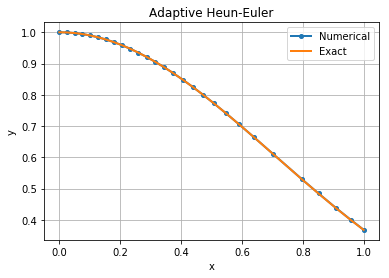

In [18]:
# Numerical example 7
def f(x, y):
    return -2*x*y

def y_exact(x):
    return exp(-x**2)

h0 = 100
x0, xend = 0, 1
y0 = 1

x_num, y_num = ode_adaptive(f, x0, xend, y0, h0, tol=1.e-3)

plot(x_num, y_num, '.-', x_num, y_exact(x_num))
title('Adaptive Heun-Euler')
xlabel('x')
ylabel('y')
grid(True)
legend(['Numerical', 'Exact']);

The error $|y(x_n)-y_n|$ can is

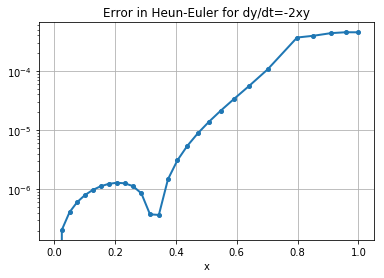

In [19]:
# Plot the error from the adaptive method
error = abs(y_exact(x_num) - y_num)
semilogy(x_num, error, '.-')
title('Error in Heun-Euler for dy/dt=-2xy')
grid(True)
xlabel('x');

And the step size will change like

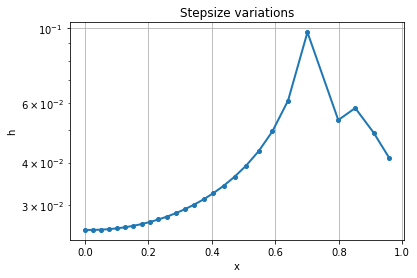

In [20]:
# Plot the step size sequence
h_n = diff(x_num)            # array with the stepsizes h_n = x_{n+1} 
x_n = x_num[0:-1]            # array with x_num[n], n=0..N-1
semilogy(x_n, h_n, '.-')
xlabel('x')
ylabel('h')
grid(True)
title('Stepsize variations');

**Numerical exercises:**
1. Solve the Lotka-Volterra equation, use for instance $h_0=0.1$ and $\text{Tol}=10^{-3}$. Notice also how the step size varies over the integration interval. 

2. Repeat the experiment using Van der Pol's equation. 

## Runge - Kutta methods
Euler's and Heun's method are both
examples of \{explicit Runge-Kutta methods} (ERK). Such schemes
are given by

<!-- Equation labels as ordinary links -->
<div id="eq:erk"></div>

$$
\begin{align*}
  \label{eq:erk} \tag{1}
  \mb{k}_1 & = \mb{f}(t_n,\mb{y}_n), \\ 
  \mb{k}_2 & = \mb{f}(t_n+c_2h, \mb{y}_n+ha_{21}\mb{k}_1), \nonumber \\ 
  \mb{k}_3 & = \mb{f}\big(t_n+c_3h, \mb{y}_n+h(a_{31}\mb{k}_1 + a_{32}\mb{k}_2)\big), \nonumber \\ 
      & \vdots \nonumber \\ 
  \mb{k}_s &= \mb{f}\big(t_n+c_sh, \mb{y}_n + h\sum_{j=1}^{s-1}a_{sj}\mb{k}_j \big), \nonumber \\ 
  \mb{y}_{n+1} &= \mb{y}_n + h\sum_{i=1}^s b_i \mb{k}_i, \nonumber
\end{align*}
$$

where $c_i,\; a_{ij}$ and $b_i$ are coefficients defining the
method. We always require $c_i = \sum_{j=1}^s a_{ij}$. 
Here, $s$ is the number of \textit{stages}, or the number of function
evaluations needed for each step. The vectors $\mb{k}_i$ are called stage
derivatives. Also implicit methods, like the trapezoidal rule,

$$
\mb{y}_{n+1} = \mb{y}_n+\frac{h}{2}\big(\mb{f}(t_n,\mb{y}_n)+\mb{f}(t_n+h,\mb{y}_{n+1})\big)
$$

can be written in a similar form,

$$
\begin{align*}
  \mb{k}_1 &= \mb{f}(t_n,\mb{y}_n), \\ 
  \mb{k}_2 &= \mb{f}\big(t_n+h,\mb{y}_n+\frac{h}{2}(\mb{k}_1+\mb{k}_2)\big), \\ 
  \mb{y}_{n+1} &= \mb{y}_n+\frac{h}{2}(\mb{k}_1+\mb{k}_2).
\end{align*}
$$

But, contrary to what is the case for explicit methods, a
nonlinear system of equations has to be solved to find $\mb{k}_2$.

**Definition: Runge - Kutta methods.**

An $s$-stage Runge-Kutta method is given by

$$
\begin{align*}
     \mb{k}_i &= \mb{f}\big(t_n+c_ih,\mb{y}_n+h\sum_{j=1}^s a_{ij}\mb{k}_j\big), \qquad i=1,2,\cdots,s, \\ 
     \mb{y}_{n+1} &= \mb{y}_n + h\sum_{i=1}^s b_i \mb{k}_i.
  \end{align*}
$$

The method is defined by its coefficients, which is given in a
*Butcher tableau*

$$
\begin{array}{c|cccc}
    c_1 & a_{11} & a_{12} & \cdots & a_{1s} \\ 
    c_2 & a_{21} & a_{22} & \cdots & a_{2s} \\ 
    \vdots & \vdots &&&\vdots \\ 
    c_s & a_{s1} & a_{s2} & \cdots & a_{ss} \\ \hline
        & b_1 & b_2 & \cdots & b_s 
  \end{array}
$$

with

$$
c_i = \sum_{j=1}^s a_{ij}, \quad
    i=1,\cdots,s.
$$

The method is *explicit* if $a_{ij}=0$ whenever $j\geq i$,
  otherwise *implicit*.



A Runge - Kutta methods with an error estimate are usually called *embedded Runge - Kutta methods* or *Runge - Kutta pairs*, and
the coefficients can be written in a Butcher tableau as follows

$$
\begin{array}{c|ccccl}
    c_1 & a_{11} & a_{12} & \cdots & a_{1s} \\ 
    c_2 & a_{21} & a_{22} & \cdots & a_{2s} \\ 
    \vdots & \vdots &&&\vdots \\ 
    c_s & a_{s1} & a_{s2} & \cdots & a_{ss} \\ \hline
        & b_1 & b_2 & \cdots & b_s  & \qquad\text{Order $p$}\\ \hline
        & \widehat{b}_1 & \widehat{b_2} & \cdots & \widehat{b}_s  & \qquad\text{Order $p+1$}
   \end{array}.
$$

The error estimate is then given by

$$
\mb{le}_{n+1} = h\sum_{i=1}^s (\widehat{b}_i - b_i)\mb{k}_i.
$$

**Example 5:**
  The Butcher-tableaux for the methods presented so far are

$$
\begin{array}{ccccccc}
    \displaystyle
    \begin{array}{c|c}
      0 & 0 \\ \hline & 1
    \end{array}
    & \qquad  &
    \displaystyle
    \begin{array}{c|cc}
      0 & 0 & 0\\ 1 & 1 &0 \\ \hline & \frac{1}{2} & \frac{1}{2} 
    \end{array}
    & \qquad &
    \displaystyle
    \begin{array}{c|cc}
      0 & 0 & 0 \\ 1 &  \frac{1}{2} & \frac{1}{2} \\ \hline & \frac{1}{2} & \frac{1}{2}  
    \end{array} \\ 
    \text{Euler} && \text{Heun} && \text{trapezoidal rule}
  \end{array}
$$

and the Heun-Euler pair can be written as

$$
\begin{array}{c|cc} 0 & & \\ 1 & 1 &   \\ \hline & 1 & 0 \\ \hline \displaystyle & \frac{1}{2} &  \frac{1}{2} 
 \end{array}
$$

See this [list of Runge - Kutta methods](https://en.wikipedia.org/wiki/List_of_Runge–Kutta_methods) for more. 

### Order conditions for Runge - Kutta methods

It can be proved that a Runge - Kutta method is of order $p$ if all the conditions up to and including $p$ in the table below are satisfied.

$$
\begin{array}{c|c|c} 
   p  & \text{conditions}  \\ \hline 
   1 & \sum b_i = 1 \\ \hline 
  2 & \sum b_i c_i = 1/2 \\ \hline 
  3 & \sum b_i c_i^2 = 1/3\\ 
   & \sum b_i a_{ij} c_j = 1/6 
  \\ \hline 
  4 & \sum b_ic_i^3=1/4 \\ 
  & \sum b_i c_i a_{ij}c_j=1/8 \\ 
  & \sum b_i a_{ij}c_j^2=1/12 \\ 
  & \sum b_i a_{ij} a_{jk} c_k = 1/24 \\ \hline 
\end{array}
$$

where sums are taken over all the indices from 1 to $s$. 

**Example 6:**
Apply the conditions to Heun's method, for which $s=2$ and the Butcher tableau is

$$
\begin{array}{c|cc} 
c_1 & a_{11} & a_{12} \\ c_2 & a_{21} & a_{22} \\ \hline & b_1 & b_2 
\end{array}
=
\begin{array}{c|cc}
0 & 0 & 0 \\ 1 & 1 & 0 \\ \hline & \frac{1}{2} & \frac{1}{2} 
\end{array}.
$$

The order conditions are:

$$
\begin{align*}
p&=1 & b_1 + b_2 &= \frac{1}{2} + \frac{1}{2}= 1 && \text{OK} \\ \mbox{}\\ \hline \\ 
p&=2 & b_1c_1 + b_2 c_2 &= \frac{1}{2}\cdot 0 + \frac{1}{2}\cdot 1 = \frac{1}{2} && \text{OK}\\ \mbox{} \\ \hline \\ 
p&=3 & b_1c_1^2 + b_2c_2^2 &= \frac{1}{2}\cdot 0^2 + \frac{1}{2}\cdot 1^2 = \frac{1}{2} \not= \frac{1}{3} && \text{Not satisfied} \\ 
 &   & b_1(a_{11}c_1+a_{12}c_2)+b_2(a_{21}c_1+a_{22}c_2) &= \frac{1}{2}(0\cdot0 + 0\cdot 1) + \frac{1}{2}(1\cdot 0 + 0\cdot 1) \\ 
      &&&= 0 \not=\frac{1}{6} && \text{Not satisfied}
\end{align*}
$$

The method is of order 2.